In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Number of Instance (number of data)**  
**Number of Attribute (number of column)**  

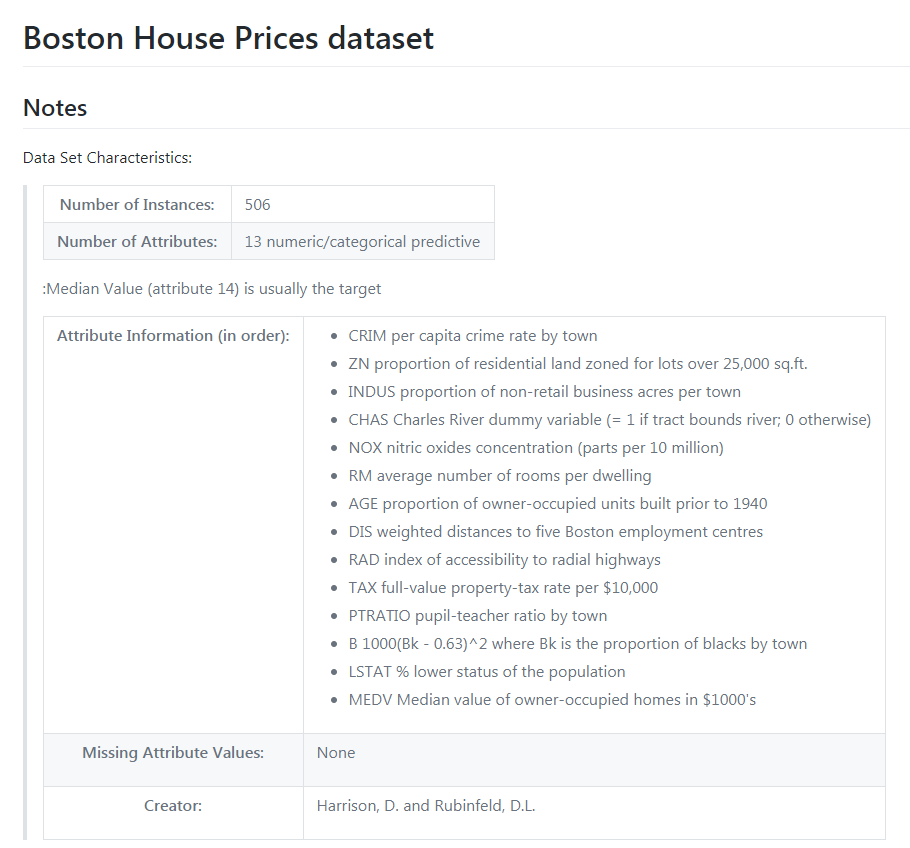

<br>
<br>

#### 1-1. (미국 보스턴의 주택 가격) 데이터 읽어들이기

#### 1) Features

In [ ]:
df_data = pd.read_excel('boston_house_data.xlsx', index_col=0, encoding='utf-8') # 엑셀 파일 읽기
df_data.head() # 윗부분만 보려면?

#### df_data (Data, x)

- 0 : **범죄율**
- 1 : **25,000 평방피트를 초과하는 거주지역 비율**
- 2 : **비소매상업지역 면적 비율** 
- 3 : **찰스강의 경계에 위치한 경우는 1, 아니면 0**
- 4 : **일산화질소 농도**
- 5 : **주택당 방 수 (거실 외 subroom)**
- 6 : **1940년 이전에 건축된 주택의 비율**
- 7 : **직업센터의 거리**
- 8 : **방사형 고속도로까지의 거리**
- 9 : **재산세율**
- 10 : **학생/교사 비율**
- 11 : **인구 중 흑인 비율**
- 12 : **인구 중 하위 계층 비율**

#### 2) Target

In [ ]:
df_target = pd.read_excel('boston_house_target.xlsx', index_col=0, encoding='utf-8')
df_target.head()

#### df_target (Target, y)
- Town 내 주택 가격의 중앙값 (단위 : $1,000)

**DataFrame을 합치는 방법**
#### 1.  a= a.join(b) # index column의 수가 동일해야 함  
#### 2.  a=pd.merge(a, b, left_on='a 기준열 이름', right_on='b 기준열 이름', how='inner' /l, r, outer)

**outer는 모든 data를 붙이고**  
**left는 left에 해당하는 DataFrame은 모두 저장되고 right에서 left와 겹치는 것만 저장**  

#### 3) Features & Target 합쳐서 살펴보기

In [ ]:
df_main = pd.concat([df_data, df_target], axis=1) # concatenate # 데이터 붙이는 방법은 신중히 axis=1 은 행연산이지만 붙는 모양은 열로
df_main.head()

In [ ]:
# 열 이름 통째로 바꾸기
df_main.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'] 
df_main.head()

In [ ]:
df_main.describe() # description

<br>
<br>

#### 1-2. Dataframe 을 Numpy array (배열, 행렬)로 바꿔주기

In [ ]:
# A Visual Intro to NumPy and Data Representation @ http://j.mp/2NtZbSd

boston_data = np.array(df_data)
boston_target = np.array(df_target)

In [ ]:
boston_data.shape, boston_data.ndim

In [ ]:
#df=pd.DataFrame(boston_data)

In [ ]:
boston_data

In [ ]:
type(boston_data) # 무슨 타입?

In [ ]:
boston_target

In [ ]:
type(boston_target)

In [ ]:
# array 의 차원수 확인 (506개의 라벨값)

boston_target.shape

<br>
<br>

#### 2. Feature 선택하기

In [ ]:
# Use only one feature 

# 항상 행렬 형태로 뽑아서 모델에게 던져줘야 합니다
boston_X = boston_data[:, 12:13] # 인구 중 하위 계층 비율 
# 행렬처럼 하나의 열로 빼 주기 위해서 범위를 지정해 줘야 한다.
# 단순히 인덱스로만 하면 리스트로 뽑히기 때문에 행렬 연산이 안된다.

boston_X

In [ ]:
#sample_matrix = np.array(?)

In [ ]:
#sample_matrix[?]

In [ ]:
boston_Y = boston_target
boston_Y

<br>
<br>

#### 3. Training & Test set 으로 나눠주기

In [ ]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.20, random_state=0)
# random_state (random_seed or seed) : make the result reproducible

**어떤 곳에서 실험을 하더라도 실험의 재현성을 위해 random_state 를 지정해줘야 한다.**  
**다른사람과의 비교와 재현을 위해 동일한 기준이 필요하다.**  
**기준이 되는 것이 random_state이다.**  

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

<br>
<br>

#### 4. 비어있는 모델 객체 만들기

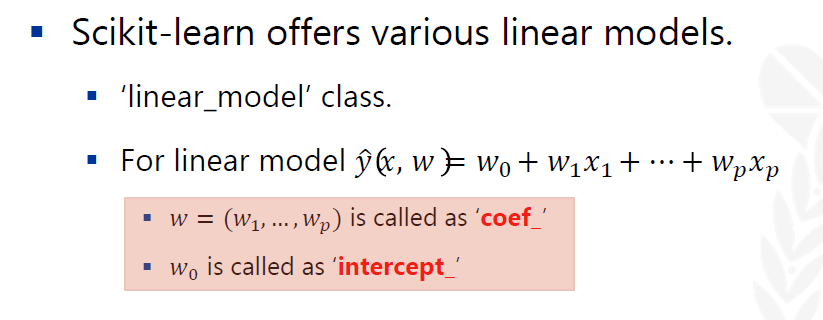

In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression() # 선형회귀
model = linear_model.Lasso()

<br>
<br>

#### 5. 모델 객체 학습시키기 (on training data)

In [ ]:
# Train the model using the training sets

model.fit(x_train, y_train) # 모델에 데이터를 '맞춰줍니다'

In [ ]:
print('Coefficients: ', model.coef_) # 기울기

In [ ]:
print('Intercepts: ', model.intercept_) # y 절편

In [ ]:
# y = (기울기) * x + (y 절편)

<br>
<br>

#### 6. 학습이 끝난 모델 테스트하기 (on test data)

In [ ]:
model.predict(x_train) # '예측하다'

In [ ]:
# 354개 Train 데이터에 대한 Model 의 Mean squared error 
print('MSE(Training data) : ', np.mean((model.predict(x_train) - y_train) ** 2))

In [ ]:
# Use this!
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('MSE(Training data) : ', mean_squared_error(model.predict(x_train), y_train))

In [ ]:
# 152개 Test 데이터에 대한 Model 의 Mean squared error 
print('MSE(Test data) : ', mean_squared_error(model.predict(x_test), y_test))
#print('MSE(Test data) : ', mean_absolute_error(model.predict(x_test), y_test))

In [ ]:
# Square root of error
np.sqrt( mean_squared_error(model.predict(x_test), y_test) )

<br>
<br>

#### 7. 모델 시각화

In [ ]:
plt.figure(figsize=(10, 10))

plt.scatter(x_test, y_test, color="black") # Test data
plt.scatter(x_train, y_train, color="red", s=1) # Train data

plt.plot(x_test, model.predict(x_test), color="blue", linewidth=3) # Fitted line

plt.show()

<br>
<br>

#### Practice. 더 좋은 성능을 보이는 Feature 를 찾아보세요! (FINAL Version)

MSE(Training data) :  37.933978172880295
MSE(Test data) :  39.81715050474416


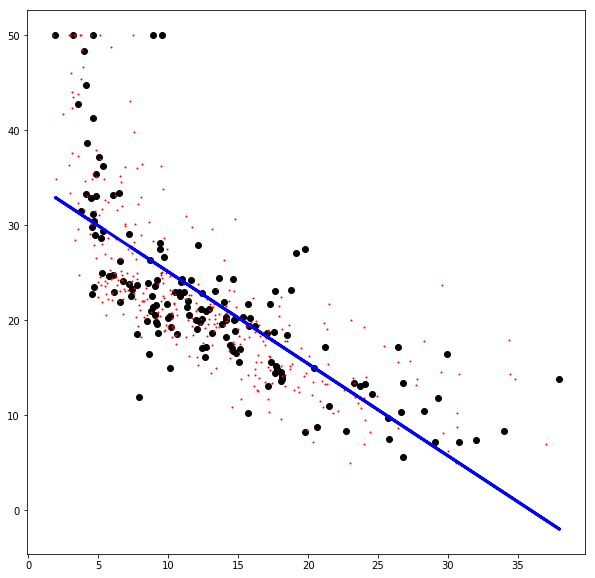

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection, linear_model
from sklearn.metrics import mean_squared_error

df_data = pd.read_excel('boston_house_data.xlsx', index_col=0, encoding='utf-8') # 엑셀 파일 읽기
df_target = pd.read_excel('boston_house_target.xlsx', index_col=0, encoding='utf-8')

# 1. Prepare the data (array!)
boston_data = np.array(df_data)
boston_target = np.array(df_target)

# 2. Feature selection
boston_X = boston_data[:, 12:13] 
#boston_X = boston_data[:, 11:13] 

boston_Y = boston_target

# 3. Train/Test split
x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=0)

# 4. Create model object 
model = linear_model.LinearRegression()

# optional 4. model for GradientBoostingRegressor()
#from sklearn import ensemble
#model = ensemble.GradientBoostingRegressor()

# 5. Train the model 
model.fit(x_train, y_train)

# 6. Test the model
print('MSE(Training data) : ', mean_squared_error(model.predict(x_train), y_train))
print('MSE(Test data) : ', mean_squared_error(model.predict(x_test), y_test))

# 7. Visualize the model
plt.figure(figsize=(10, 10))
plt.scatter(x_test, y_test, color="black") # Test data
plt.scatter(x_train, y_train, color="red", s=1) # Train data
plt.plot(x_test, model.predict(x_test), color="blue", linewidth=3) # Fitted line
plt.show()